In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("preprocessedData.csv")

In [3]:
data.isna().sum()

gender            0
ssc_b             0
hsc_b             0
hsc_s             0
degree_t          0
workex            0
specialisation    0
status            0
sl_no             0
ssc_p             0
hsc_p             0
degree_p          0
etest_p           0
mba_p             0
salary            0
dtype: int64

In [4]:
data.drop(['sl_no'],axis=1,inplace=True)

In [5]:
data.cov()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
ssc_p,117.228377,60.348373,42.897137,37.659225,24.535952,1.976764e+04
hsc_p,60.348373,118.755706,34.819820,35.461678,22.555846,4.600806e+04
degree_p,42.897137,34.819820,54.151103,21.929469,17.272020,-8.064357e+03
etest_p,37.659225,35.461678,21.929469,176.251018,16.886973,1.571579e+05
mba_p,24.535952,22.555846,17.272020,16.886973,34.028376,6.611551e+04
salary,19767.643976,46008.057275,-8064.357161,157157.850783,66115.509283,5.999726e+09


In [6]:
data.corr()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
ssc_p,1.000000,0.511472,0.538404,0.261993,0.388478,0.023571
hsc_p,0.511472,1.000000,0.434206,0.245113,0.354823,0.054506
degree_p,0.538404,0.434206,1.000000,0.224470,0.402364,-0.014148
etest_p,0.261993,0.245113,0.224470,1.000000,0.218055,0.152829
mba_p,0.388478,0.354823,0.402364,0.218055,1.000000,0.146324
salary,0.023571,0.054506,-0.014148,0.152829,0.146324,1.000000


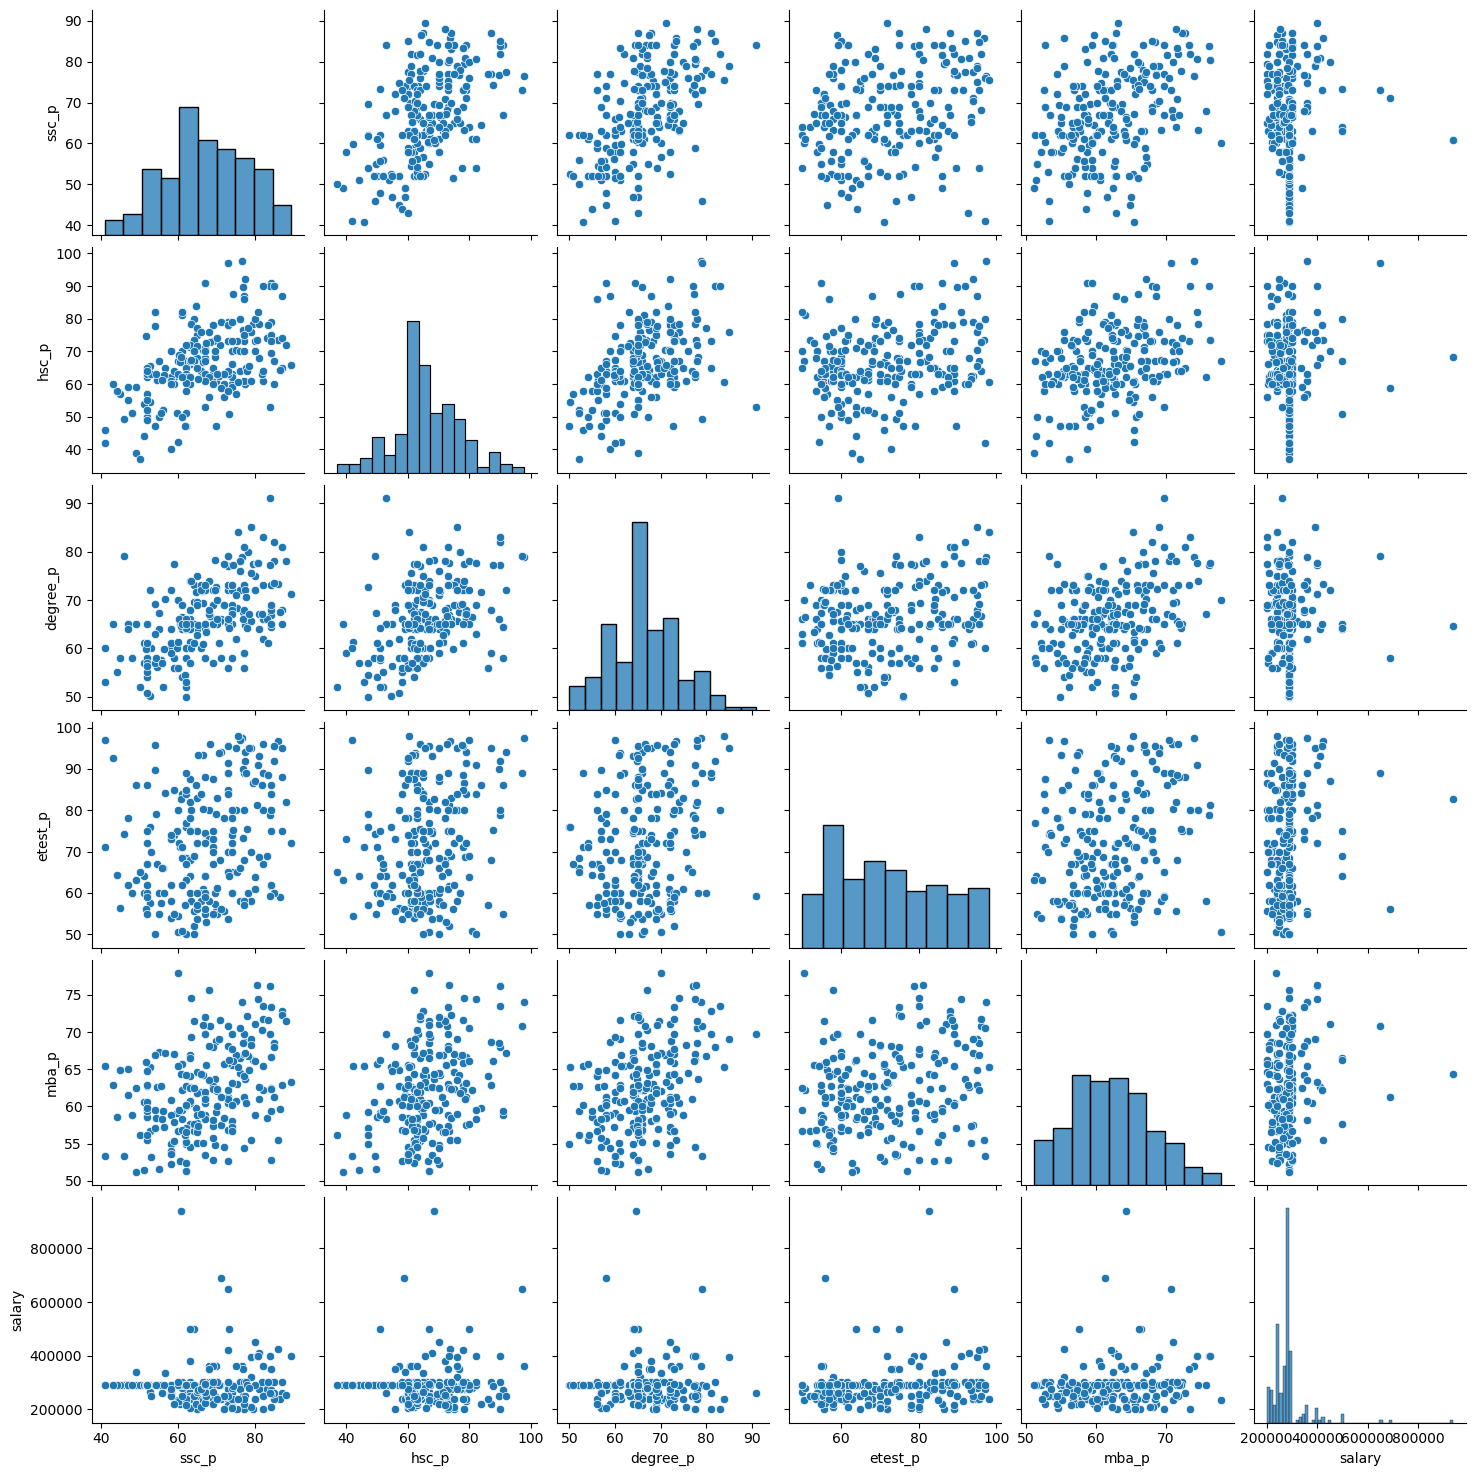

In [7]:
#graphical representation of Multi colinearity

import seaborn as sns
sns.pairplot(data)

In [9]:
data.shape

(215, 14)

In [12]:
data.shape[0]

215

In [13]:
data.shape[1]

14

In [16]:
#!pip install statsmodels

In [22]:
# Measuring the Multi colinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [24]:
 def quanqual(data):
        quan=[]
        qual=[]

        for columnname in data.columns:
            #print(columnname)
            if(data[columnname].dtypes=='O'):
                qual.append(columnname)
                #print("Qual")
            else:
                quan.append(columnname)
                #print("quan")
        return quan,qual

In [26]:
quan,qual=quanqual(data)

In [27]:
quan

['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']

In [51]:
def measureVIF(data):
 
#Create an empty pandas DataFrame
    vif=pd.DataFrame()

#add column name variable and assign column names of data    
    vif['variables']=data.columns

#for loop to get the values in columns and sending to calculate VIF for every value and store it in 'VIF'    
    vif['VIF']=[variance_inflation_factor(data.values,column) for column in range(data.shape[1])]
    
    return vif
        
     

In [52]:
measureVIF(data[quan])

,variables,VIF
0,ssc_p,67.026700
1,hsc_p,56.131492
2,degree_p,112.755275
3,etest_p,33.696391
4,mba_p,108.585463
5,salary,15.167704


In [ ]:
#since mba_p,degree_p has highest maesure deleting it may change other variables measure lower. 

In [58]:
measureVIF(data[['etest_p','salary']])

,variables,VIF
0,etest_p,11.944567
1,salary,11.944567


In [ ]:
#since the VIF is more than 5, using dimensionality annalysis it has to be reduced below 5 for further process.